<a href="https://colab.research.google.com/github/RautRitesh/langgraph/blob/main/interview_taker_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
parsed_data_resume={'full_name': 'Ritesh Raut',
                    'summary': 'I am a dedicated and passionate undergraduate Computer Science student with extensive research experience in Deep Learning, Natural Language Processing (NLP), RAG architectures, autonomous AI agents, and production-grade system development.',
                    'email': 'ritesh222@gmail.com',
                    'phone': '+977-12345678',
                    'skills': ['Python', 'C++', 'Julia', 'JavaScript', 'Dart', 'C#', 'TensorFlow', 'Scikit-learn', 'Pandas', 'NumPy', 'FAISS', 'LangChain', 'Hugging Face Transformers', 'RAG Architectures', 'SpaCy', 'NLTK', 'Git', 'GitHub', 'FastAPI', 'Django', 'Linux/Unix environments', 'Deep Learning', 'Computer Vision', 'Transfer Learning', 'System Scalability', 'Strategic Problem Solving', 'Cross-Functional Collaboration', 'User-Centric Design', 'Technical Communication'],
                    'work_experience': [
                        {'role': 'AI/ML Intern',
                         'company': 'Huncha Digital',
                         'duration': 'August 2025 – November 2025',
                         'technologies': ['LangGraph', 'React', 'NLP', 'Speech Recognition', 'Machine Learning'],
                         'key_achievements': ['Engineered a scalable LangGraph React Agent, implementing robust backend logic to autonomously resolve 100+ daily user queries with 93% accuracy, significantly reducing manual support load.', 'Developed a voice-based food ordering system leveraging NLP and speech recognition, increasing order processing efficiency by 30%.', 'Implemented multi-modal AI architectures integrating text, voice, and retrieval intelligence to optimize user interaction flows.', 'Collaborated with cross-functional teams to design and integrate multi-modal AI systems, aligning technical implementations with business requirements for text and voice intelligence.']},
                         {'role': 'Academic Researcher',
                          'company': 'Tribhuvan University',
                          'duration': 'Spring 2024 – Present',
                          'technologies': ['Machine Learning', 'Regression', 'Clustering', 'Power BI'],
                          'key_achievements': ['Executed predictive modeling using Machine Learning algorithms (Regression & Clustering) on demographic data from 10 administrative wards to forecast service bottlenecks and optimize digital service delivery.',
                                               'Applied analytical skills to audit Nepal’s National Identity (NNID) biometric architectures and cybersecurity protocols, proposing enhanced data protection mechanisms to mitigate identity fraud.', 'Engineered dynamic Power BI dashboards to visualize citizen interaction patterns for a population of 70,000+, achieving a 20% increase in municipal work efficiency through data-driven resource allocation.']}
                        ],
                    'projects': [
                        {'name': 'Cogni-chat: RAG-Based Document Analysis System', 'description': 'Engineered a web-based Retrieval-Augmented Generation (RAG) application enabling conversational interaction with PDF, DOCX, and TXT files.',
                         'technologies': ['RAG', 'Hugging Face', 'FAISS'], 'url': 'Hugging Face Space'},
                         {'name': 'AI-Powered Skincare Diagnostic System', 'description': 'Developed and trained a custom Convolutional Neural Network (CNN) on diverse datasets, achieving a validation accuracy of 82% for skin type classification.',
                          'technologies': ['Convolutional Neural Network', 'FastAPI'], 'url': None},
                           {'name': 'Community Interest Calculator', 'description': 'Architected and deployed a localized mobile application using Flutter, automating complex interest calculations for community finance groups.',
                            'technologies': ['Flutter'], 'url': None}
                        ],
                    'education': [{'degree': 'Bachelor of Science in Computer Science and Information Technology', 'institution': 'Tribhuvan University', 'year': 'Ongoing'}], 'certifications': []}



In [23]:
full_name=parsed_data_resume.get("full_name")
workexperience=parsed_data_resume.get("work_experience")
projects=parsed_data_resume.get("projects")

In [24]:
job_description="""Focus: Neural Networks, LLM Agents (LangChain & LangGraph)
Type: Internship (Full-time / Part-time / Remote / On-site – customize)
Duration: 3–6 Months
Location: Nepal / Remote

About the Role

We are looking for a hands-on AI/ML Intern who enjoys building things—not just reading papers. You will work on real-world AI systems, including neural network models and LLM-based agents using LangChain and LangGraph.

This is a build-first internship. If you like experimenting, breaking things, fixing them, and shipping working AI features—this role is for you."""



In [4]:
pip install langchain langchain-groq langchain-community langchain-core langgraph

In [82]:
from typing import TypedDict, Literal
from langchain_groq import ChatGroq
from langgraph.graph import MessagesState, StateGraph, START, END
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage

In [83]:
memory=MemorySaver()

In [84]:
class WorkExperience(TypedDict):
  role:str
  company:str
  technologies:list[str]
  key_achievements:list[str]

class Projects(TypedDict):
  name:str
  description:str
  technologies:list[str]

In [85]:
class AgentState(MessagesState):
  workexperience:list[WorkExperience]
  projects:list[Projects]
  full_name:str
  job_description:str

In [86]:
from google.colab import userdata
api_key=userdata.get('groq_api_key')

In [87]:
llm=ChatGroq(model="openai/gpt-oss-120b",api_key=api_key)

In [96]:
# Updated System Prompt with Persona and Guidelines
system_prompt = """You are a friendly and professional Technical Recruiter named "Alex".
Your goal is to interview the candidate (Ritesh) for an AI/ML role.

Follow these strict guidelines:
1.  **Introduction:** If the chat history is empty or this is the first message, YOU MUST start by briefly introducing yourself and asking Ritesh to introduce himself. Do not ask a technical question yet.
2.  **Conversational Flow:** Ask ONE question at a time. Keep your questions concise and natural, like a real human speaking. Avoid long, complex sentences.
3.  **Step-by-Step:** Do not bombard the candidate. Start with general background questions before moving to specific technical challenges in their 'projects' or 'workexperience'.
4.  **Follow-ups:** Listen to the user's answers. If an answer is short or vague, ask a friendly follow-up question to dig deeper.
5.  **Context:** Use the resume details provided to form relevant questions, but do not just copy-paste the text. Rephrase it naturally.

Your objective is to have a smooth conversation, not an interrogation. Never provide the answers yourself."""

prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user", "Candidate Profile: Name: {full_name}. Projects: {projects}. Experience: {workexperience}. Job Description: {job_description}")
])

llm_question_generator = prompt | llm | StrOutputParser()

In [97]:
def agent_node(state:AgentState):
  chat_history=state["messages"]
  work_experience=state.get("workexperience")
  job_description=state.get("job_description")
  full_name=state.get("full_name")
  projects=state.get("projects",[])
  response=llm_question_generator.invoke({"chat_history":chat_history,"full_name":full_name,"workexperience":work_experience,"job_description":job_description,"projects":projects})
  return {"messages":[response]}

In [98]:
def human_feedback(state:AgentState):
  pass


In [99]:
def router(state:AgentState)->Literal[END,"hr_agent"]:
  messages=state["messages"]
  if len(messages)>10:
    return END
  else:
    return "hr_agent"

In [100]:
graph=StateGraph(AgentState)
graph.add_node("hr_agent",agent_node)
graph.add_node("human_feedback",human_feedback)
graph.set_entry_point("hr_agent")
graph.add_edge("hr_agent","human_feedback")
graph.add_conditional_edges("human_feedback",router,{END:END,"hr_agent":"hr_agent"})
app=graph.compile(checkpointer=memory,interrupt_before=["human_feedback"])



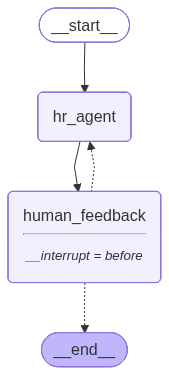

In [101]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [102]:
config={"configurable":{"thread_id":"8"}}

In [103]:
while True:
  snapshot=app.get_state(config)
  print(snapshot.next)
  if snapshot.next:
    last_message=snapshot.values.get("messages")[-1]
    print(f"AI:\n{last_message.content}")
    human_response=input("Please Enter your answer:\n")
    app.update_state(
        config,
        HumanMessage(content=human_response)
    )
    events=app.stream(None,config=config,stream_mode="values")
    for event in events:
      event["messages"][-1].pretty_print()
  else:
    events=app.stream({"workexperience":workexperience,"full_name":full_name,"job_description":job_description,"messages":"start to ask question please","projects":projects},config=config,stream_mode="values")
    for event in events:
      event["messages"][-1].pretty_print()



()
================================ Human Message =================================

start to ask question please
================================ Human Message =================================

Hi Ritesh! I’m Alex, a technical recruiter working with the AI/ML team. I’d love to hear a bit about you—could you introduce yourself and share what sparked your interest in AI/ML?
('human_feedback',)
AI:
Hi Ritesh! I’m Alex, a technical recruiter working with the AI/ML team. I’d love to hear a bit about you—could you introduce yourself and share what sparked your interest in AI/ML?
Please Enter your answer:
my name is ritesh raut,currently studying BSC.CSIT from tribhuvan university nepal.I was interested in AI after knowing about is potential especially after the release of chatgpt and seeing its features
================================ Human Message =================================

Hi Ritesh! I’m Alex, a technical recruiter working with the AI/ML team. I’d love to hear a bit about you—co

KeyboardInterrupt: Interrupted by user